# Simple Binary Classifier using Keras

## SIIM Github Repo
https://github.com/ImagingInformatics/machine-learning/blob/master/Education/KerasBinaryClassifier/SIIM_Keras_Binary_Classifier.ipynb

### Task 

Train a deep learning model to classify sagittal T1 MRI sequences into pre- or post-contrast.

### Requirements

1. Basic understanding of machine learning and deep learning
2. Programming in Python

### Learning objectives

At the end of this activity, you will be able to:

1. Understand how to organize your data to use it to train a deep learning model
2. Use the standard data handler from Keras (DataGenerator) to access your dataset to train a model
3. Create a custom convolutional neural network
4. Train a model
5. Calculate metrics in the Validation and Test sets


### Acknowledgements

This Jupyter Notebook was based on code by Paulo Eduardo de Aguiar Kuriki (paulokuriki@gmail.com), modified by Felipe Kitamura (kitamura.felipe@gmail.com).

---

# TODO: install gdown and restart runtime

Run the cell below. Then depending on whether you are running this in a jupyter notebook or on Google Colab follow these instructions:

**Jupyter** - click on the 'Kernel' tab at the top of the notebook and choose 'Restart & Clear Output'. Rerun all the cells from the start of the notebook to this point before moving on.

**Colab** - click on the 'Runtime' tab at the top of the notebook and choose 'Restart Runtime'. Rerun all the cells from the start of the notebook to this point before moving on.

These steps ensure that the installation takes effect. We will use gdown to download the data set shortly.

In [33]:
!pip install -U --no-cache-dir gdown --pre

You should consider upgrading via the '/Users/m242982/anaconda3/envs/LMSa/bin/python -m pip install --upgrade pip' command.


# TODO: Setting your Team Name

In [34]:
# Enter your Team Name below
team = 'tester'# TODO: choose a team name

In [35]:
print("Your Team Name is:", team)

Your Team Name is: tester


## Dataset Format

First of all, we need to split out images into training, validation and test sets

For this task, we have a separate test folder and a training folder. The training folder will be split into training and validation by our code.

The files are organized in the following folder structure:

#### Train/with_gad/ - contains the files of sequences with contrast

#### Train/no_gad/ - contains the files of sequences without contrast

#### Test/with_gad/ - contains the files of sequences with contrast

#### Test/no_gad/ - contains the files of sequences without contrast



First thing we need to do is to download the dataset. **This will take a few minutes. Read ahead while you wait.**  

Then we unzip our dataset.

In [36]:
import os
import gdown

if not os.path.exists('Train.zip'): # check if already downloaded
    gdown.download('https://drive.google.com/uc?id=1rffWXRBaePSo7JMwJm1ygDdpgs7FZuTi', 'Train.zip', quiet=False)
    !unzip Train.zip
if not os.path.exists('Test.zip'):
    gdown.download('https://drive.google.com/uc?id=1x4LTeyPgLNndsP8w0rtn-pCV0LzOVc1H', 'Test.zip', quiet=False)
    !unzip Test.zip

Downloading...
From: https://drive.google.com/uc?id=1rffWXRBaePSo7JMwJm1ygDdpgs7FZuTi
To: /Users/m242982/dev/AIHC5010/aihc5010-leaderboard/notebooks/classification/Train.zip
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 107M/107M [02:52<00:00, 623kB/s]

Archive:  Train.zip
   creating: Train/with_gad/
  inflating: Train/with_gad/00558898.png  
  inflating: Train/with_gad/00931920.png  
  inflating: Train/with_gad/01016775.png  
  inflating: Train/with_gad/01164686.png  
  inflating: Train/with_gad/01570500.png  
  inflating: Train/with_gad/01628395.png  
  inflating: Train/with_gad/01797880.png  
  inflating: Train/with_gad/02211929.png  
  inflating: Train/with_gad/02750513.png  
  inflating: Train/with_gad/02895508.png  
  inflating: Train/with_gad/04318409.png  
  inflating: Train/with_gad/04378784.png  
  inflating: Train/with_gad/04940452.png  
  inflating: Train/with_gad/06069926.png  
  inflating: Train/with_gad/06084046.png  
  inflating: Train/with_gad/06146675.png  
  inflating: Train/with_gad/07306247.png  
  inflating: Train/with_gad/07640971.png  
  inflating: Train/with_gad/07735832.png  
  inflating: Train/with_gad/07880929.png  
  inflating: Train/with_gad/09327518.png  
  inflating: Train/with_gad/09356730.png  
  inf

  inflating: Train/with_gad/33117457.png  
  inflating: Train/with_gad/33119550.png  
  inflating: Train/with_gad/34096307.png  
  inflating: Train/with_gad/34707596.png  
  inflating: Train/with_gad/34760765.png  
  inflating: Train/with_gad/34826131.png  
  inflating: Train/with_gad/36209736.png  
  inflating: Train/with_gad/36392576.png  
  inflating: Train/with_gad/36941022.png  
  inflating: Train/with_gad/37107326.png  
  inflating: Train/with_gad/37163339.png  
  inflating: Train/with_gad/37205876.png  
  inflating: Train/with_gad/37579671.png  
  inflating: Train/with_gad/37777693.png  
  inflating: Train/with_gad/37917853.png  
  inflating: Train/with_gad/39044143.png  
  inflating: Train/with_gad/40314788.png  
  inflating: Train/with_gad/41497912.png  
  inflating: Train/with_gad/41579861.png  
  inflating: Train/with_gad/41775669.png  
  inflating: Train/with_gad/41940952.png  
  inflating: Train/with_gad/41973799.png  
  inflating: Train/with_gad/42441675.png  
  inflating

  inflating: Train/no_gad/10686275.png  
  inflating: Train/no_gad/11278013.png  
  inflating: Train/no_gad/11345287.png  
  inflating: Train/no_gad/11364066.png  
  inflating: Train/no_gad/11906446.png  
  inflating: Train/no_gad/11990618.png  
  inflating: Train/no_gad/12004748.png  
  inflating: Train/no_gad/12005799.png  
  inflating: Train/no_gad/12166336.png  
  inflating: Train/no_gad/12239883.png  
  inflating: Train/no_gad/12328652.png  
  inflating: Train/no_gad/12501497.png  
  inflating: Train/no_gad/12703660.png  
  inflating: Train/no_gad/12776373.png  
  inflating: Train/no_gad/13135921.png  
  inflating: Train/no_gad/13215867.png  
  inflating: Train/no_gad/13233074.png  
  inflating: Train/no_gad/13497617.png  
  inflating: Train/no_gad/13610163.png  
  inflating: Train/no_gad/14089122.png  
  inflating: Train/no_gad/14294567.png  
  inflating: Train/no_gad/14606780.png  
  inflating: Train/no_gad/14683287.png  
  inflating: Train/no_gad/14725397.png  
  inflating: Tra

  inflating: Train/no_gad/43194760.png  
  inflating: Train/no_gad/43646183.png  
  inflating: Train/no_gad/43702667.png  
  inflating: Train/no_gad/43735636.png  
  inflating: Train/no_gad/43911787.png  
  inflating: Train/no_gad/43979079.png  
  inflating: Train/no_gad/43989027.png  
  inflating: Train/no_gad/44737714.png  
  inflating: Train/no_gad/44863853.png  
  inflating: Train/no_gad/45047157.png  
  inflating: Train/no_gad/45154089.png  
  inflating: Train/no_gad/45505025.png  
  inflating: Train/no_gad/45586590.png  
  inflating: Train/no_gad/45635621.png  
  inflating: Train/no_gad/45844500.png  
  inflating: Train/no_gad/46150276.png  
  inflating: Train/no_gad/46682178.png  
  inflating: Train/no_gad/46836362.png  
  inflating: Train/no_gad/46842943.png  
  inflating: Train/no_gad/46850952.png  
  inflating: Train/no_gad/46952924.png  
  inflating: Train/no_gad/46966912.png  
  inflating: Train/no_gad/47064945.png  
  inflating: Train/no_gad/47140781.png  
  inflating: Tra

  inflating: Train/no_gad/73755895.png  
  inflating: Train/no_gad/73803285.png  
  inflating: Train/no_gad/73888425.png  
  inflating: Train/no_gad/74102225.png  
  inflating: Train/no_gad/74166674.png  
  inflating: Train/no_gad/74385908.png  
  inflating: Train/no_gad/74852722.png  
  inflating: Train/no_gad/74877270.png  
  inflating: Train/no_gad/74948765.png  
  inflating: Train/no_gad/75116466.png  
  inflating: Train/no_gad/75137207.png  
  inflating: Train/no_gad/75635564.png  
  inflating: Train/no_gad/75715702.png  
  inflating: Train/no_gad/75720700.png  
  inflating: Train/no_gad/75823557.png  
  inflating: Train/no_gad/75917165.png  
  inflating: Train/no_gad/76109875.png  
  inflating: Train/no_gad/76130916.png  
  inflating: Train/no_gad/76133728.png  
  inflating: Train/no_gad/76419574.png  
  inflating: Train/no_gad/76620122.png  
  inflating: Train/no_gad/76650268.png  
  inflating: Train/no_gad/76687988.png  
  inflating: Train/no_gad/77470414.png  
  inflating: Tra

Downloading...
From: https://drive.google.com/uc?id=1x4LTeyPgLNndsP8w0rtn-pCV0LzOVc1H
To: /Users/m242982/dev/AIHC5010/aihc5010-leaderboard/notebooks/classification/Test.zip
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51.2M/51.2M [01:16<00:00, 672kB/s]

Archive:  Test.zip
   creating: Test/with_gad/
  inflating: Test/with_gad/00482297.png  
  inflating: Test/with_gad/01998768.png  
  inflating: Test/with_gad/02719777.png  
  inflating: Test/with_gad/04097921.png  
  inflating: Test/with_gad/04208745.png  
  inflating: Test/with_gad/05972861.png  
  inflating: Test/with_gad/06086898.png  
  inflating: Test/with_gad/06195703.png  
  inflating: Test/with_gad/07030599.png  
  inflating: Test/with_gad/07140263.png  
  inflating: Test/with_gad/07213262.png  
  inflating: Test/with_gad/08327394.png  
  inflating: Test/with_gad/09014461.png  
  inflating: Test/with_gad/11032044.png  
  inflating: Test/with_gad/12669854.png  
  inflating: Test/with_gad/12906182.png  
  inflating: Test/with_gad/13312042.png  
  inflating: Test/with_gad/14088052.png  
  inflating: Test/with_gad/14407266.png  
  inflating: Test/with_gad/17500802.png  
  inflating: Test/with_gad/17835433.png  
  inflating: Test/with_gad/18324219.png  
  inflating: Test/with_gad/18


  inflating: Test/with_gad/85503504.png  
  inflating: Test/with_gad/88531219.png  
  inflating: Test/with_gad/88925290.png  
  inflating: Test/with_gad/88975169.png  
  inflating: Test/with_gad/89418803.png  
  inflating: Test/with_gad/92424272.png  
  inflating: Test/with_gad/92577864.png  
  inflating: Test/with_gad/94853093.png  
  inflating: Test/with_gad/95056546.png  
  inflating: Test/with_gad/97823923.png  
  inflating: Test/with_gad/99096864.png  
  inflating: Test/with_gad/99425363.png  
  inflating: Test/with_gad/99511711.png  
   creating: Test/no_gad/
  inflating: Test/no_gad/00145902.png  
  inflating: Test/no_gad/00245479.png  
  inflating: Test/no_gad/00259585.png  
  inflating: Test/no_gad/00475906.png  
  inflating: Test/no_gad/00813730.png  
  inflating: Test/no_gad/00990154.png  
  inflating: Test/no_gad/01107158.png  
  inflating: Test/no_gad/01286953.png  
  inflating: Test/no_gad/02476062.png  
  inflating: Test/no_gad/02704653.png  
  inflating: Test/no_gad/03

  inflating: Test/no_gad/45301454.png  
  inflating: Test/no_gad/45483316.png  
  inflating: Test/no_gad/45747343.png  
  inflating: Test/no_gad/45797452.png  
  inflating: Test/no_gad/46096410.png  
  inflating: Test/no_gad/46535477.png  
  inflating: Test/no_gad/46710677.png  
  inflating: Test/no_gad/47045211.png  
  inflating: Test/no_gad/47122850.png  
  inflating: Test/no_gad/47274094.png  
  inflating: Test/no_gad/48948118.png  
  inflating: Test/no_gad/49006477.png  
  inflating: Test/no_gad/49248777.png  
  inflating: Test/no_gad/49270832.png  
  inflating: Test/no_gad/49475558.png  
  inflating: Test/no_gad/49716374.png  
  inflating: Test/no_gad/50055010.png  
  inflating: Test/no_gad/50070546.png  
  inflating: Test/no_gad/50168892.png  
  inflating: Test/no_gad/50291310.png  
  inflating: Test/no_gad/50405596.png  
  inflating: Test/no_gad/50786966.png  
  inflating: Test/no_gad/50954027.png  
  inflating: Test/no_gad/51013148.png  
  inflating: Test/no_gad/51065911.png  


  inflating: Test/no_gad/91454670.png  
  inflating: Test/no_gad/91637639.png  
  inflating: Test/no_gad/92320699.png  
  inflating: Test/no_gad/92495543.png  
  inflating: Test/no_gad/92918039.png  
  inflating: Test/no_gad/92998209.png  
  inflating: Test/no_gad/93178336.png  
  inflating: Test/no_gad/93284118.png  
  inflating: Test/no_gad/93308969.png  
  inflating: Test/no_gad/93318094.png  
  inflating: Test/no_gad/93408213.png  
  inflating: Test/no_gad/93469498.png  
  inflating: Test/no_gad/93593001.png  
  inflating: Test/no_gad/94103822.png  
  inflating: Test/no_gad/94138802.png  
  inflating: Test/no_gad/94441516.png  
  inflating: Test/no_gad/95008239.png  
  inflating: Test/no_gad/95265743.png  
  inflating: Test/no_gad/95291501.png  
  inflating: Test/no_gad/95436925.png  
  inflating: Test/no_gad/95514052.png  
  inflating: Test/no_gad/95699626.png  
  inflating: Test/no_gad/95795858.png  
  inflating: Test/no_gad/95838793.png  
  inflating: Test/no_gad/95848813.png  


## If the automatic download fails. You can manually grab the data sets from these links:

https://drive.google.com/file/d/1rffWXRBaePSo7JMwJm1ygDdpgs7FZuTi/view?usp=sharing

https://drive.google.com/file/d/1x4LTeyPgLNndsP8w0rtn-pCV0LzOVc1H/view?usp=sharing

If you manually downloaded the data sets uncomment the two lines below to unzip them

In [ ]:
# !unzip Train.zip
# !unzip Test.zip

## Importing the libraries we will need

In [4]:
import sys
import requests
import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

def sub_model(team, hyperparam):
  url='https://aihc5010.pythonanywhere.com/submit-model/'
  hyperparam['team']=team
  hyperparam['ModelKey']='lab2'
  x=requests.post(url,data=hyperparam)
  if x.status_code==200:
      print(f"Model Submitted Successfully for team {team}")
  else:
      print(x.status_code)
      print(x.text)
      print("Failed to Submit")

In [5]:
# Here we define the folders where our dataset is saved.
TRAIN_DATA_DIR = './Train/'
TEST_DATA_DIR = './Test/'

## Visualise some training set examples

### with contrast

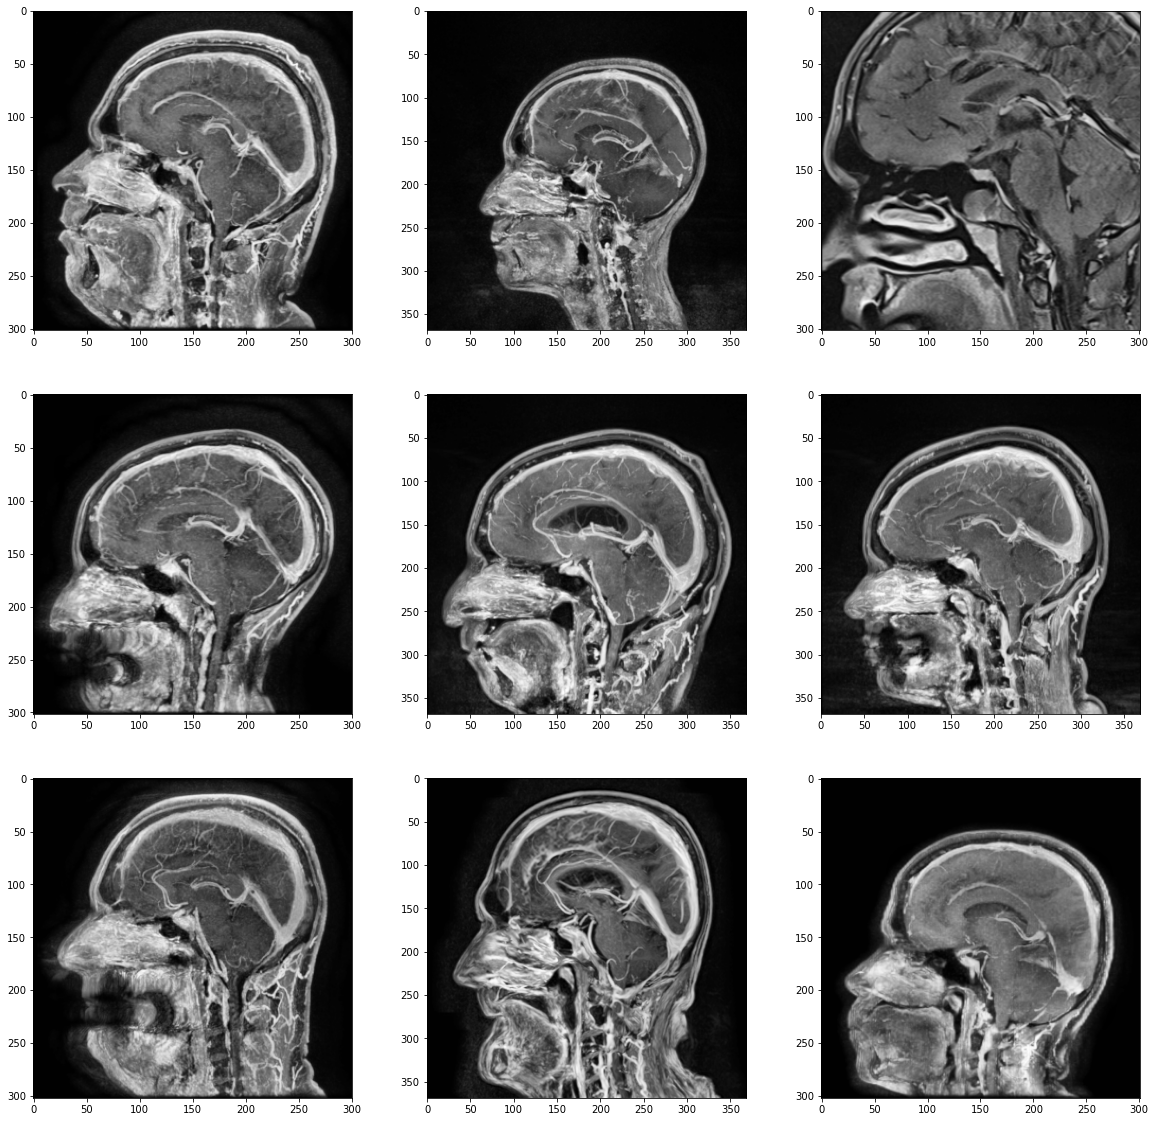

In [6]:
fig = plt.figure(figsize=(20,20))
for i,f in enumerate(os.listdir(os.path.join(TRAIN_DATA_DIR, 'with_gad'))[:9]):
    # make sure the file is a .png image
    if not f.endswith('.png'):
        continue
    img = mpimg.imread(os.path.join(TRAIN_DATA_DIR, 'with_gad', f))
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(img, cmap='gray')
plt.show()

### without contrast

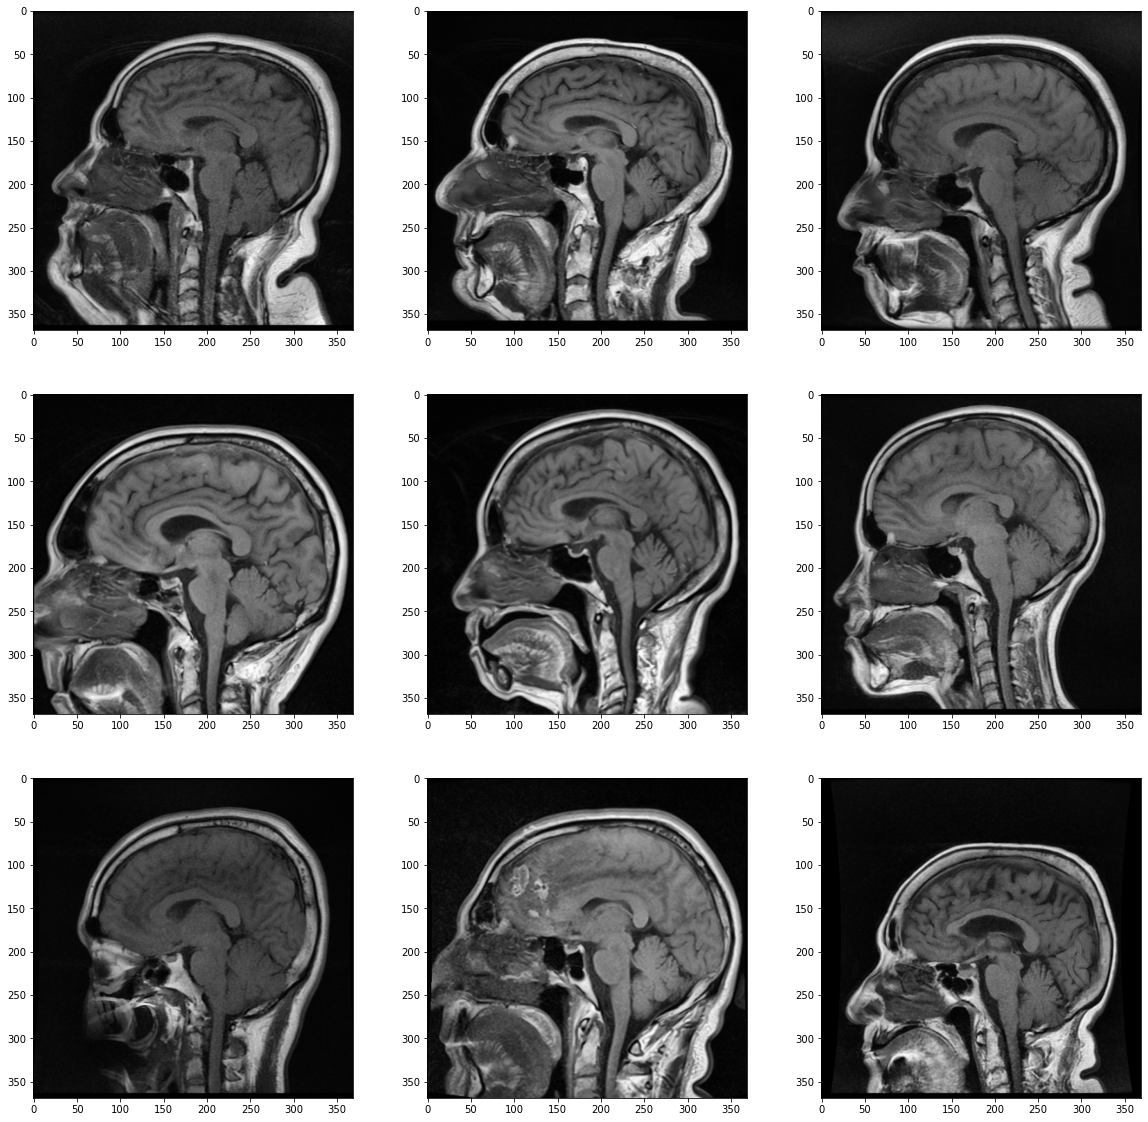

In [7]:
fig = plt.figure(figsize=(20,20))
for i,f in enumerate(os.listdir(os.path.join(TRAIN_DATA_DIR, 'no_gad'))[:9]):
    # make sure the file is a .png image
    if not f.endswith('.png'):
        continue
    img = mpimg.imread(os.path.join(TRAIN_DATA_DIR, 'no_gad', f))
    ax = fig.add_subplot(3,3,i+1)
    ax.imshow(img, cmap='gray')
plt.show()

## TODO: Number of training and test set examples of each class

#### Verify the number of examples available for the training and test sets. Take as many lines of code as you need. Hint: check the visualisation cells above for an example of iterating over all files in a directory that end with a .png extension.

In [8]:
n_training_with_gad = len([f for f in os.listdir(os.path.join(TRAIN_DATA_DIR, 'with_gad')) if f.endswith('.png')]) # TODO: calculate the number of training examples with contrast
print('Number of training examples with contrast: {}'.format(n_training_with_gad))
n_training_no_gad = len([f for f in os.listdir(os.path.join(TRAIN_DATA_DIR, 'no_gad')) if f.endswith('.png')]) # TODO: calculate the number of training examples without contrast
print('Number of training examples without contrast: {}'.format(n_training_no_gad))
n_training = n_training_with_gad + n_training_no_gad
print('Number of training examples : {}\n'.format(n_training))

n_test_with_gad = len([f for f in os.listdir(os.path.join(TEST_DATA_DIR, 'with_gad')) if f.endswith('.png')]) # TODO: calculate the number of test examples with contrast
print('Number of test examples with contrast: {}'.format(n_test_with_gad))
n_test_no_gad = len([f for f in os.listdir(os.path.join(TEST_DATA_DIR, 'no_gad')) if f.endswith('.png')]) # TODO: calculate the number of test examples without contrast
print('Number of test examples without contrast: {}'.format(n_test_no_gad))
n_test = n_test_with_gad + n_test_no_gad
print('Number of test examples : {}'.format(n_test))

Number of training examples with contrast: 208
Number of training examples without contrast: 693
Number of training examples : 901

Number of test examples with contrast: 117
Number of test examples without contrast: 454
Number of test examples : 571


## Making some choices

From the visualisations above we can see that the images are different sizes. For the most part either 300-by-300 or 375-by-375 pixels.

We will resize the images to 128-by-128. We will see how the images are resized later.

In [9]:
# Here we define the input size of our neural network.
# Images will be resized automatically.
IMG_HEIGHT = 128
IMG_WIDTH = 128

Let's also choose a batch size for training.

In [10]:
# Here we define the size of the batch to leverage
# the capacity GPUs have to parallelize 
BATCH_SIZE = 8

# TODO: Training steps per epoch excercise

#### Calculate how many steps per epoch there will be during training. Use your chosen batch size and assume that *80% of the training set* will be used for training and 20% for validation. We will verify this later.

In [11]:
steps_per_epoch = int(np.ceil(n_training*0.8 / float(BATCH_SIZE))) # TODO: given your choice of batch size calculate the number of training steps per epcoh to expect
print('Steps per epoch : {}'.format(steps_per_epoch))

Steps per epoch : 91


## Defining a function to plot the learning curves

In [12]:
# This function plots the learning curves, which includes
# the loss curve and the accuracy curve over the epochs.
def plot_learning_curves(history):
    # plot loss
    plt.figure(figsize=(10, 5))
    plt.title('Binary Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='Train')
    plt.plot(history.history['val_loss'], color='orange', label='Validation')
    plt.legend(loc='upper right', shadow=True, fontsize='x-large')
    plt.show()
    # plot accuracy
    plt.figure(figsize=(10, 5))
    plt.title('Binary Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='Train')
    plt.plot(history.history['val_accuracy'], color='orange', label='Validation')
    plt.legend(loc='lower right', shadow=True, fontsize='x-large')
    plt.show()

## Creating a custom convolutional neral network

In the cell below we have provided an example CNN.

In [13]:
# Every model needs to have an input
x1 = Input(shape=(IMG_HEIGHT,IMG_WIDTH,3))

# Below, we add paired convolutional and maxpooling layers
x = Conv2D(16, (3,3), activation='relu')(x1)
x = MaxPooling2D()(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = MaxPooling2D()(x)

# Then we flatten the last vector
flat1 = Flatten()(x)
# Insert a dropout layer with 20% probability
flat2 = Dropout(0.2)(flat1)
# Then a dense layer
class1 = Dense(32, activation='relu', kernel_initializer='he_uniform')(flat2)
# And the output layer
class1b = Dense(1, activation='linear')(class1)
# The output needs to be binary, so we apply a sigmoid function
output = sigmoid(class1b)

# Here is where the model is created based on the input and output define above
model = Model(inputs=x1, outputs=output)

# We choose an optimizer
opt = Adam(lr=5e-6)

# The last step is to compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# We can see the structure and number of parameter of our network
# by calling .summary()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0         
_________________________________________________________________
dropout (Dropout)            (None, 14400)             0     

2023-01-25 17:03:24.619576: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 17:03:24.619870: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


## Now we create a Data Generator, which is a function to read the images from the folders and use them to train and validate

In [14]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   validation_split=0.2)  # set validation split

train_it = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH), # Here is where we use the image dimensions you chose above
    batch_size=BATCH_SIZE,  # Here is where we use the batch size you chose above
    class_mode='binary',
    color_mode='rgb',
    subset='training')  # set as training data

val_it = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,  # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Here is where we use the image dimensions you chose above
    batch_size=BATCH_SIZE,  # Here is where we use the batch size you chose above
    class_mode='binary',
    color_mode='rgb',
    subset='validation')  # set as validation data

Found 722 images belonging to 2 classes.
Found 179 images belonging to 2 classes.


## Show time. This is the moment we train our network

As the model trains verify that the number of training steps per epoch matches your calculation above.

Train for 91 steps, validate for 23 steps
Epoch 1/15
91/91 [==============================] - 9s 95ms/step - loss: 0.5984 - accuracy: 0.7701 - val_loss: 0.5635 - val_accuracy: 0.7709
Epoch 2/15
91/91 [==============================] - 7s 79ms/step - loss: 0.5547 - accuracy: 0.7687 - val_loss: 0.5493 - val_accuracy: 0.7709
Epoch 3/15
91/91 [==============================] - 7s 81ms/step - loss: 0.5465 - accuracy: 0.7687 - val_loss: 0.5425 - val_accuracy: 0.7709
Epoch 4/15
91/91 [==============================] - 8s 86ms/step - loss: 0.5400 - accuracy: 0.7687 - val_loss: 0.5363 - val_accuracy: 0.7709
Epoch 5/15
91/91 [==============================] - 8s 83ms/step - loss: 0.5323 - accuracy: 0.7687 - val_loss: 0.5297 - val_accuracy: 0.7709
Epoch 6/15
91/91 [==============================] - 8s 85ms/step - loss: 0.5252 - accuracy: 0.7687 - val_loss: 0.5217 - val_accuracy: 0.7709
Epoch 7/15
91/91 [==============================] - 8s 83ms/step - loss: 0.5169 - accuracy: 0.7687 - val_loss: 0

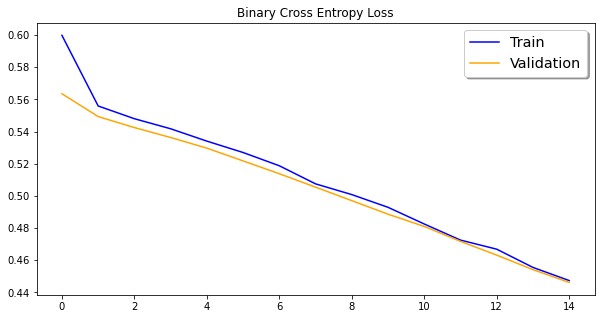

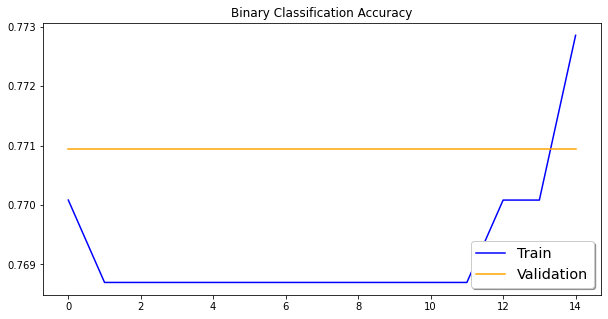

In [15]:
# The .fit() method is used to train our network
# You can specify here the number os epochs
history = model.fit(train_it, steps_per_epoch=len(train_it), 
                              validation_data=val_it, validation_steps=len(val_it), 
                              epochs=15, verbose=1)

plot_learning_curves(history)

## TODO: Interpreting the learning curves.

#### What problems can we identify with this model? What changes could you make to remedy these? Hints: Are we in the high-bias or high-variance regime? What about the rate of convergence?

* slow convergence
* high bias
* We could remedy these by increasing the learning rate and/or increasing the number of epochs.

## TODO: Interpreting the differences between the loss and accuracy curves.

#### What difference do you notice between the loss and accuracy curves? How can you explain any differences? Hint: What is the difference in what each is measuring?

* The loss curve decreases every epoch
* The accuracy curve does not decrease every epoch and shows a plateau
* The reason is that the loss is measuring soft class assignments so if the soft assigments are closer to the true labels than in previous epochs the loss will decrease. Accuracy measures hard class assignments, unless the soft assignment crosses the decision threshold to flip an incorrect label to the correct label the accuracy will not increase.

## We can save our trained model in a file so we can restore it to be used later

In [16]:
# To save your model, uncomment the following line and run this cell.

model.save('SimpleGadClass.h5')

## The following line allows us to read the model we trained

In [17]:
# Make sure the file name you try to read from is the same you saved

model = load_model('SimpleGadClass.h5')

## Here we predict the validation set so we can use both predictions and ground truth to calculate the performance metrics

In [18]:
def get_labels_and_preditions(data_iterator, model):
    i=0
    y_true = []
    y_pred = []
    x_ = []
    
    for x, y in data_iterator:
        y_true.extend(y)
        y_pred.extend(model.predict(x))
        x_.extend(x)
        i+=1
        if i==len(data_iterator):
            break
    
    y_pred = np.asarray(y_pred)
    x_ = np.asarray(x_)
    return y_true, y_pred, x_

In [19]:
val_it = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,  # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='rgb',
    subset='validation')  # set as validation data

Found 179 images belonging to 2 classes.


In [20]:
y_true, y_pred, _ = get_labels_and_preditions(val_it, model)

## Now we plot the ROC curve for the validation set

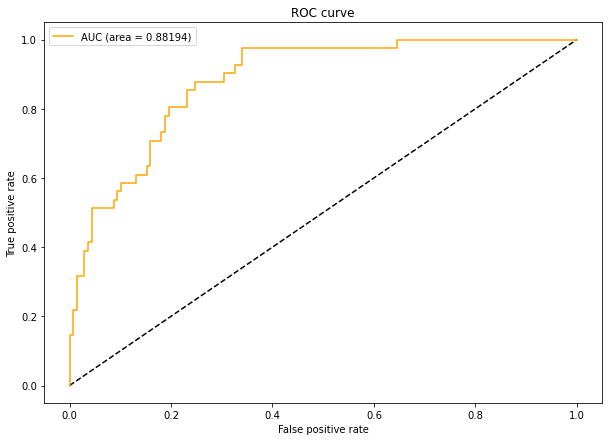

In [21]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred)

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC (area = {:.5f})'.format(auc_keras), color='orange')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## TODO: Why might AUC be better than accuracy as a metric for this data set?

* The data set is skewed at a ratio of ~ 3:1
* It is independent of any particular decision threshold

## Now we plot the confusion matrix for the validation set with a decision threshold of 0.5

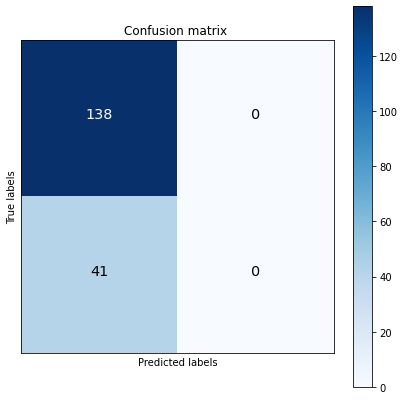

In [22]:
thresh = 0.5
cm = confusion_matrix(y_true, y_pred > thresh)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > 120 else "black", size='x-large')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## Now we find the threshold with the best  validation set accuracy

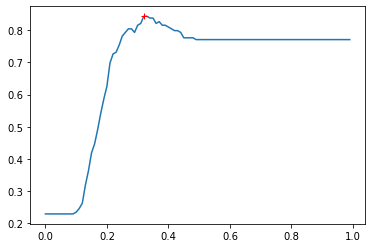

In [23]:
thr_list = []
acc_list = []
for _th in range(100):
    _th = _th / 100.
    thr_list.append(_th)
    acc_list.append(accuracy_score(y_true, y_pred > _th))

plt.figure()
plt.plot(thr_list,acc_list)
plt.plot(thr_list[acc_list.index(max(acc_list))], max(acc_list), 'r+')

plt.show()

thresh = thr_list[acc_list.index(max(acc_list))]

## TODO: Why do we select the threshold on the validation set and not the test set?

* The test set is meant to represent future unseen data and as such we should not base any modelling decisions on it.
* If we were to select the decision threshold to optimize test set accuracy we would have a biased estimate of performance on future data.

## Now we plot the confusion matrix for the validation set with the decision threshold we just calculated

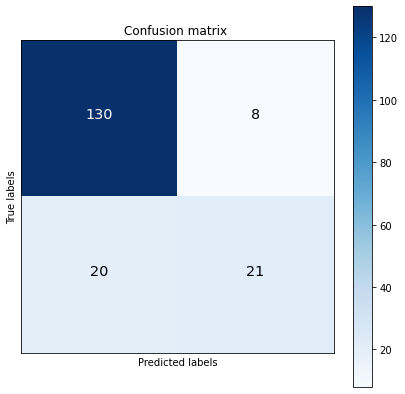

In [24]:
cm = confusion_matrix(y_true, y_pred > thresh)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > 120 else "black", size='x-large')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## Here we predict the test set so we can use both predictions and ground truth to calculate the performance metrics

In [25]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_it = test_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='rgb')  # set as training data

Found 571 images belonging to 2 classes.


In [26]:
y_true, y_pred, x_test = get_labels_and_preditions(test_it, model)

## Now we plot the ROC curve for the test set

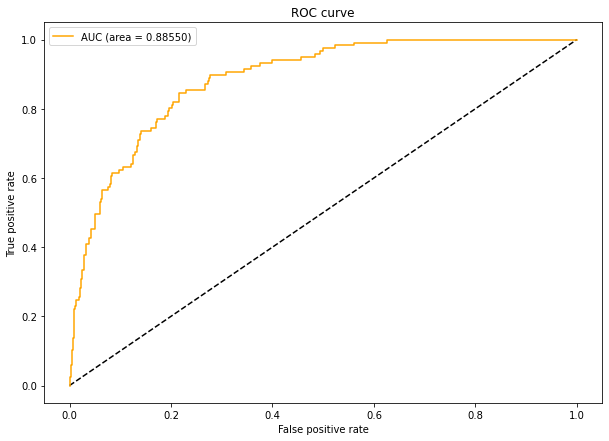

In [27]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred)

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC (area = {:.5f})'.format(auc_keras), color='orange')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Now we plot the confusion matrix for the test set

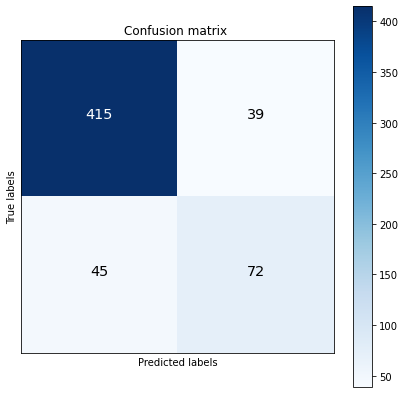

In [28]:
cm = confusion_matrix(y_true, y_pred > thresh) # apply the threshold we selected using the validation set

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > 120 else "black", size='x-large')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

## Finally, we plot a sample of the cases that our model predicted incorrectly so we can understand the errors and try to come up with solutions

Truth:1.0
Pred:0.29595894
9


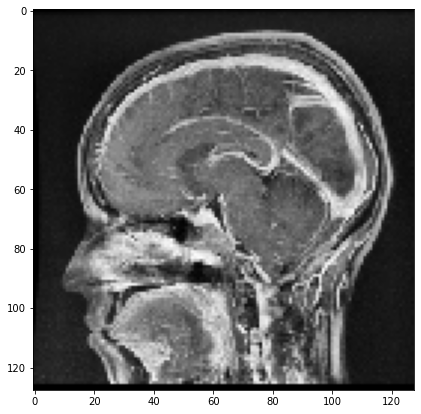

Truth:0.0
Pred:0.3989172
13


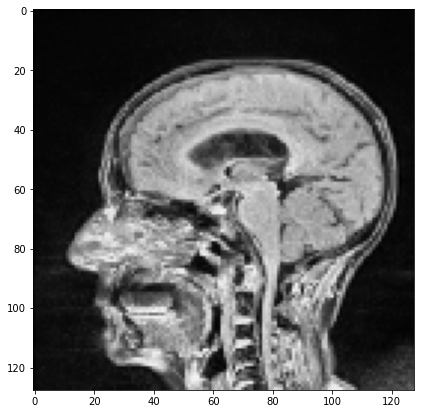

Truth:1.0
Pred:0.31725878
16


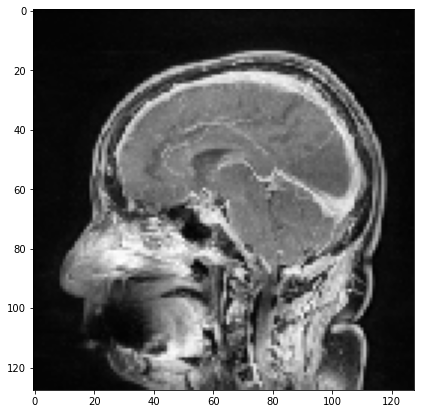

Truth:1.0
Pred:0.27307323
18


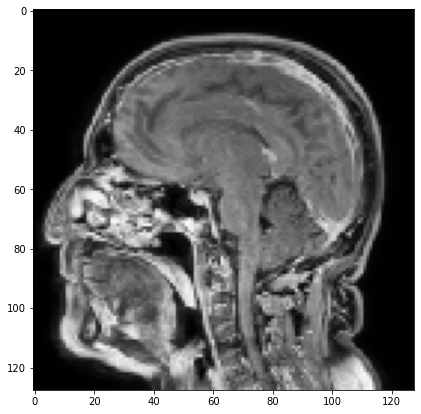

Truth:1.0
Pred:0.19497392
19


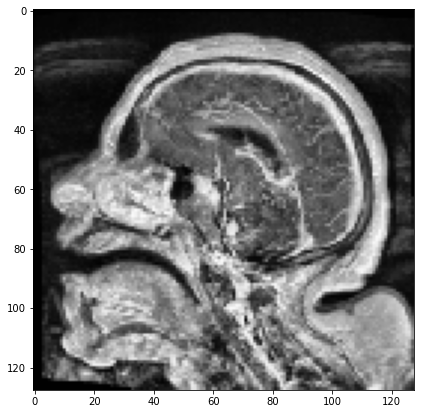

Truth:0.0
Pred:0.35858542
23


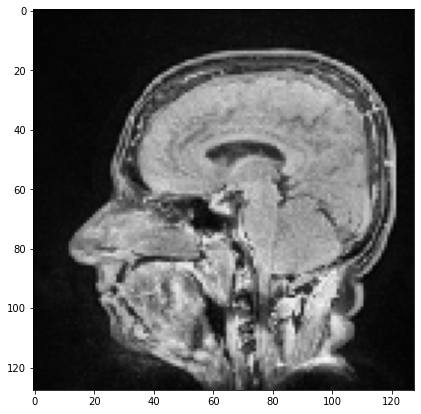

Truth:1.0
Pred:0.25754532
48


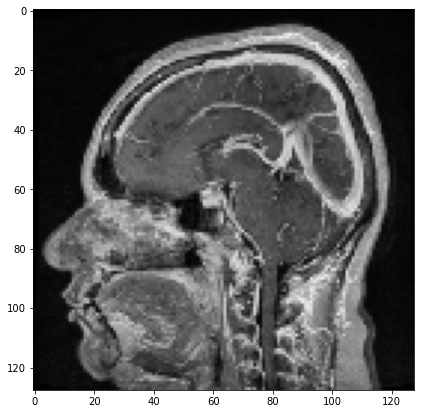

Truth:1.0
Pred:0.21836412
59


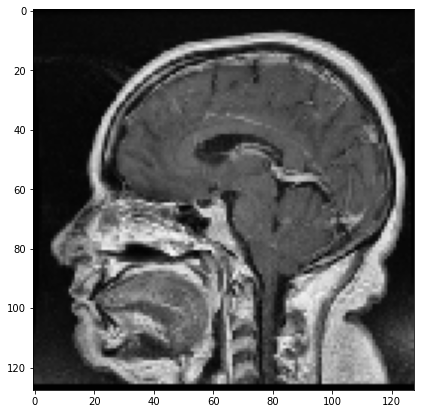

Truth:0.0
Pred:0.39942986
62


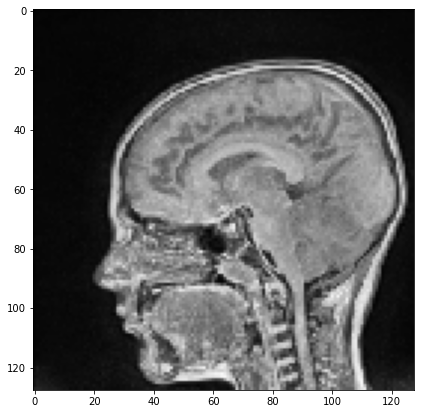

Truth:0.0
Pred:0.3522287
89


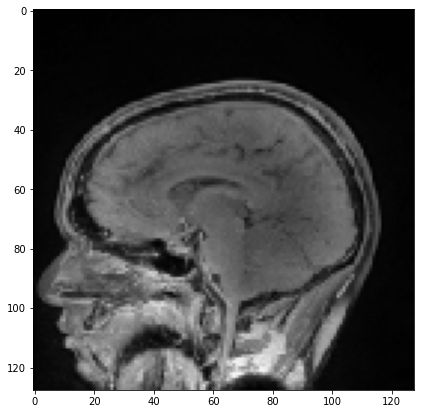

Truth:0.0
Pred:0.38172704
91


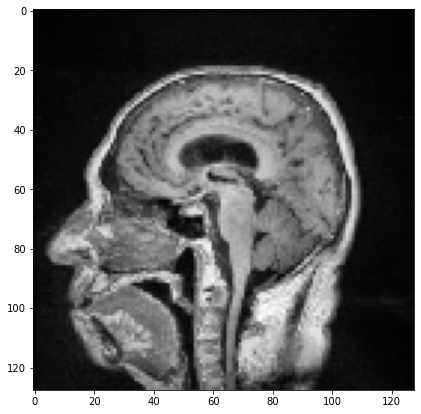

Truth:0.0
Pred:0.40318298
92


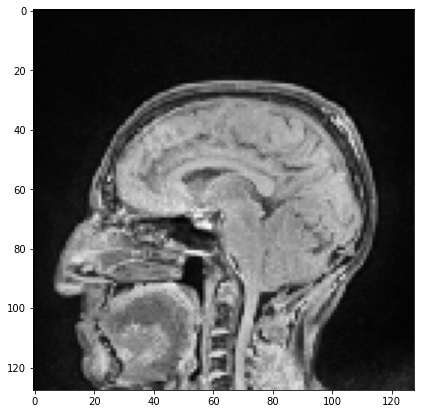

Truth:1.0
Pred:0.2580545
101


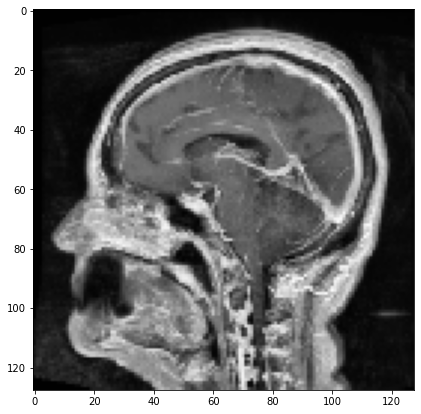

Truth:0.0
Pred:0.3480154
107


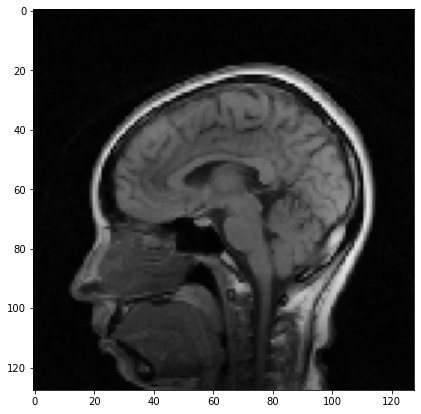

Truth:0.0
Pred:0.35193604
111


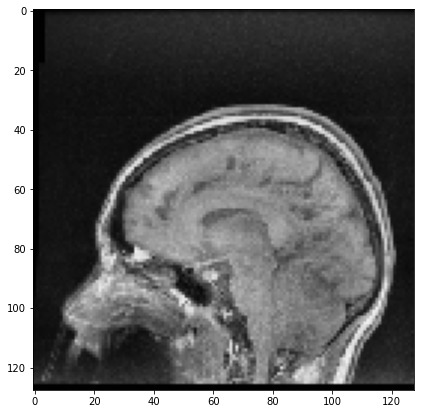

Truth:0.0
Pred:0.36051893
124


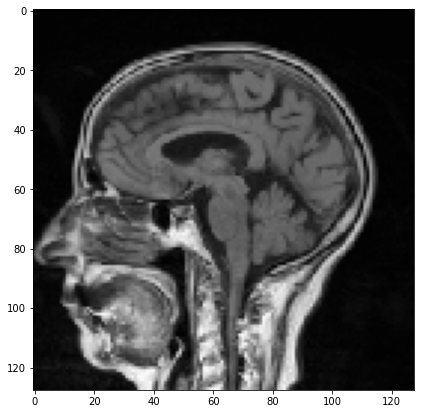

Truth:1.0
Pred:0.30907327
128


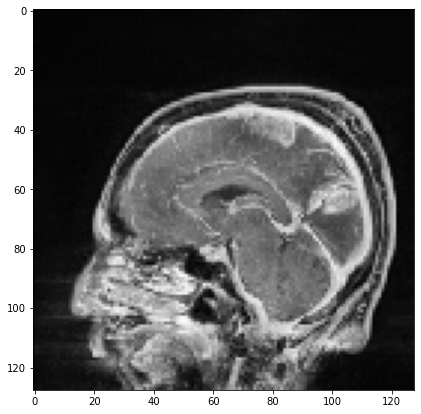

Truth:0.0
Pred:0.35903835
140


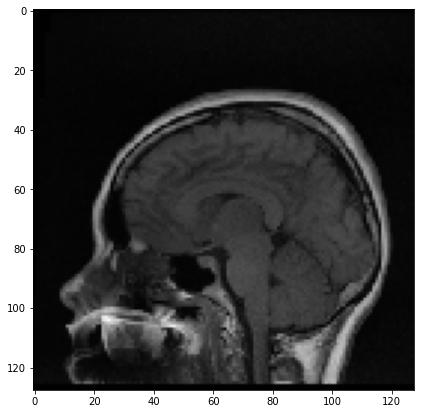

Truth:1.0
Pred:0.30131325
144


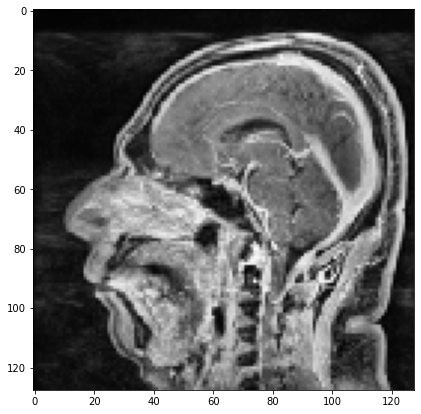

Truth:1.0
Pred:0.28703603
148


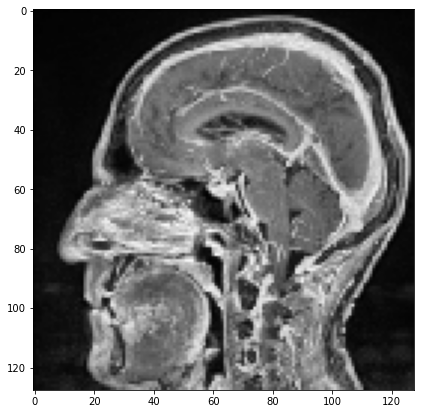

Truth:0.0
Pred:0.44444528
161


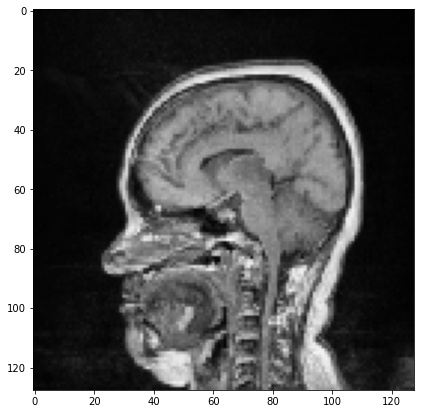

Truth:0.0
Pred:0.3409361
164


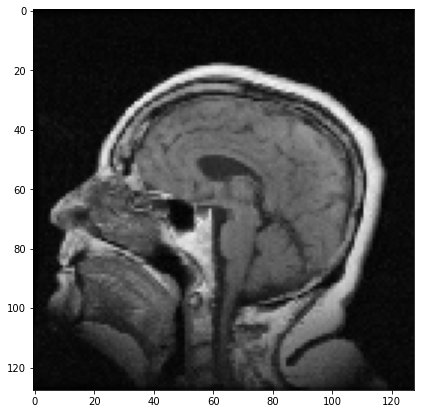

Truth:0.0
Pred:0.43212992
165


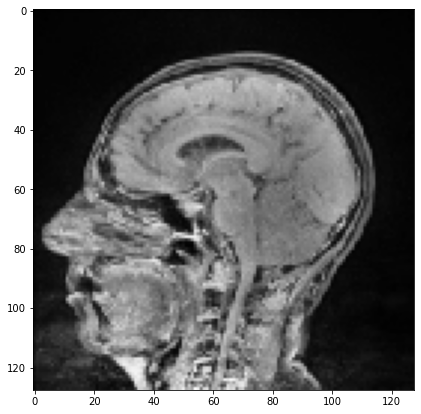

Truth:0.0
Pred:0.32356575
170


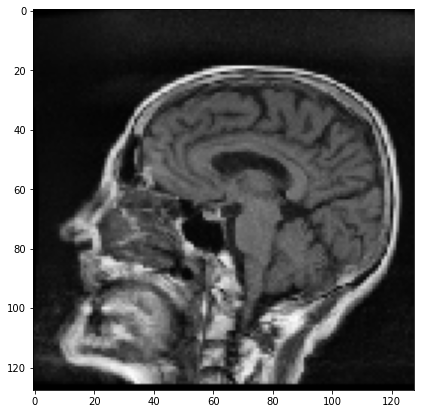

Truth:0.0
Pred:0.32282394
177


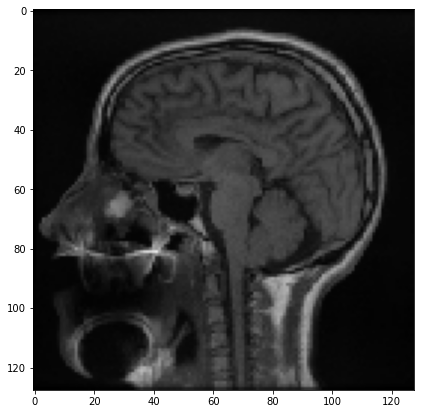

Truth:0.0
Pred:0.34152144
183


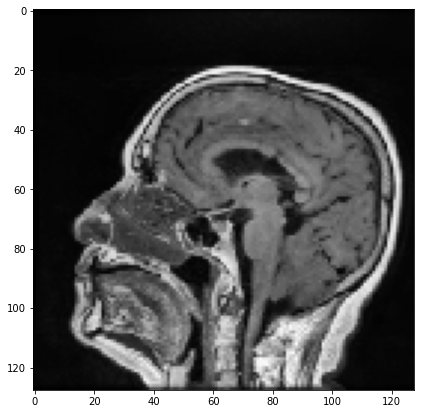

Truth:0.0
Pred:0.39674866
194


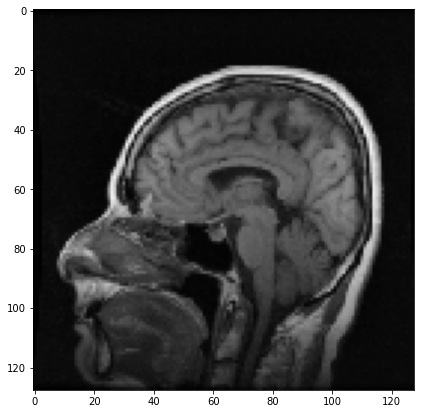

Truth:1.0
Pred:0.27319926
196


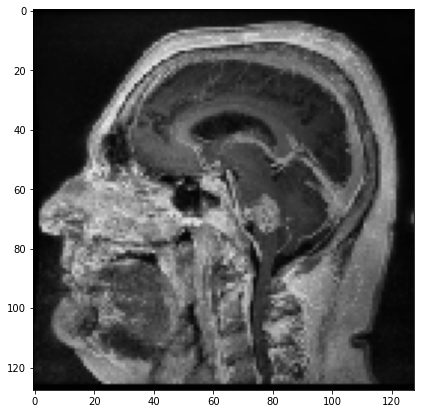

Truth:0.0
Pred:0.4029636
215


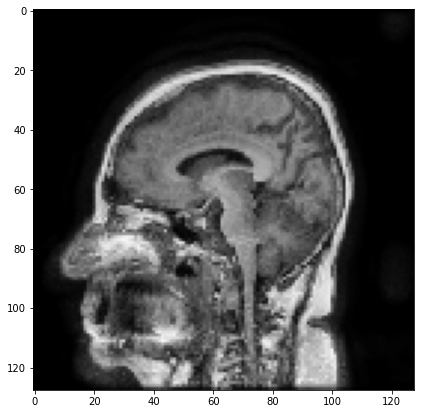

Truth:0.0
Pred:0.32062346
216


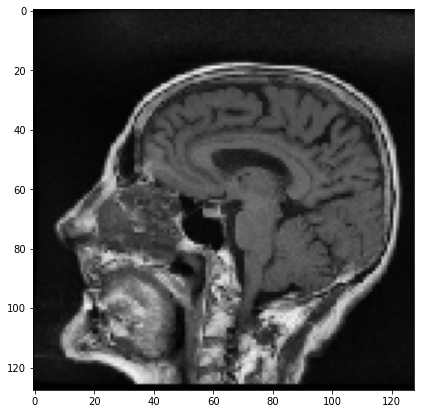

In [29]:
limit=30
counter = 0
for i in range(len(y_true)):
    if counter >= limit:
        break
    if y_true[i] != 1. * (y_pred[i, 0] > thresh):
        print('Truth:' + str(y_true[i]))
        print('Pred:' + str(y_pred[i, 0]))
        print(i)
        plt.figure(figsize=(7,7))
        plt.imshow(x_test[i])
        plt.show()
        counter += 1

## TODO: Are there any reasons you can see that might explain why some images might have failed? As a reminder a true label of 0 is no contrast a true label of 1 is with contrast.

* I don't see much to indicate any systematic errors
* Some images do look do be of lower quality and contain image artefacts compared with the sample in the visualisations above

# Now it's your turn!

## TODO: Experiment with the model architecture and training strategy to optimize performance.

* You can read the documentation for the layerswe use here https://tensorflow.org/api_docs/python/tf/keras/layers. You couls also think about incorperating batch-norm layers for example.
* For the ImageDataGenerator we have added some examples of additional arguments (currently commented out) that can be used for data augmentation. You can read more here https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
* Options for alternate optimizers are here https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 331, 331, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 329, 329, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 164, 164, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 162, 162, 16)      2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 81, 81, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 79, 79, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 39, 39, 32)        0   

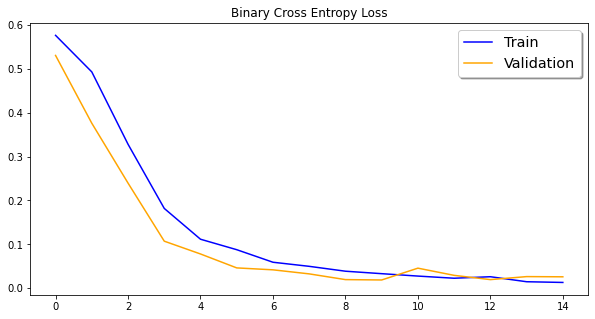

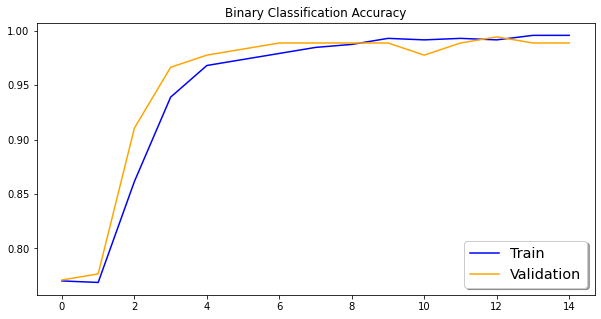

In [30]:
##########################
### BUILDING THE MODEL ###
##########################

# TODO: Experiment with the the hyperparameters

hyperparam = {
    'LearningRate': 5e-4,
    'BatchSize': 32,
    'Epochs': 15,
    'ImageSize': 331,
    'Dropout': 0.2
}

# Every model needs to have an input
IMG_HEIGHT = hyperparam['ImageSize']
IMG_WIDTH = hyperparam['ImageSize']
BATCH_SIZE = hyperparam['BatchSize']

x1 = Input(shape=(IMG_HEIGHT,IMG_WIDTH,3))

# TODO: Experiment with the model architecture. Add or remove layers.

# Below, we add paired convolutional and maxpooling layers
x = Conv2D(16, (3,3), activation='relu')(x1)
x = MaxPooling2D()(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3,3), activation='relu')(x)
x = MaxPooling2D()(x)

# Then we flatten the last vector
flat1 = Flatten()(x)
# Insert a dropout layer with 20% probability
flat2 = Dropout(hyperparam['Dropout'])(flat1)
# Then a dense layer
class1 = Dense(64, activation='relu', kernel_initializer='he_uniform')(flat2)
# And the output layer
class1b = Dense(1, activation='linear')(class1)
# The output needs to be binary, so we apply a sigmoid function
output = sigmoid(class1b)

# Here is where the model is created based on the input and output define above
model = Model(inputs=x1, outputs=output)
# We can see the structure and number of parameter of our network
# by calling .summary()
model.summary()


######################################
### DEFINING THE TRAINING STRATEGY ###
######################################

# TODO: Experiment with the training strategy. Choose data augmentation options or alter the optimizer.

# We choose an optimizer
opt = Adam(lr=hyperparam['LearningRate'])

# The last step is to compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   #shear_range=0.2,
                                   #zoom_range=0.2,
                                   #horizontal_flip=False,
                                   #vertical_flip=True,
                                   #rotation_range=0,
                                   #fill_mode='constant',
                                   #cval=0,
                                   #preprocessing_function=preprocess_input,
                                   validation_split=0.2)  # set validation split

train_it = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='rgb',
    subset='training')  # set as training data

val_it = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,  # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='rgb',
    subset='validation')  # set as validation data

history = model.fit(train_it, steps_per_epoch=len(train_it), 
                              validation_data=val_it, validation_steps=len(val_it), 
                              epochs=hyperparam['Epochs'], verbose=1)

plot_learning_curves(history)


######################
### SAVE THE MODEL ###
######################

model.save('SimpleGadClass_vesion2.h5')

## Evaluate the model and submit to the leaderboard.

############################################
### CALCULATE VALIDATION SET PERFORMANCE ###
############################################
Found 179 images belonging to 2 classes.


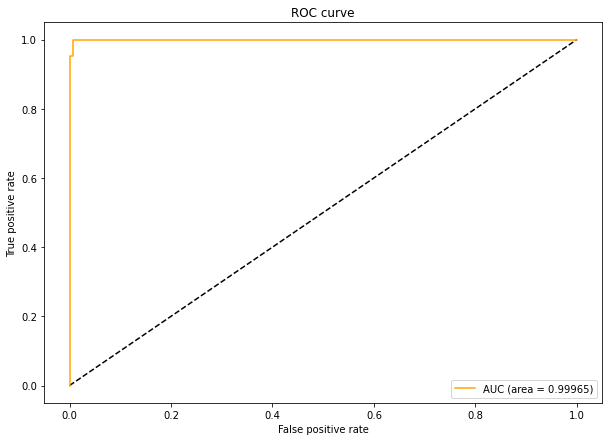

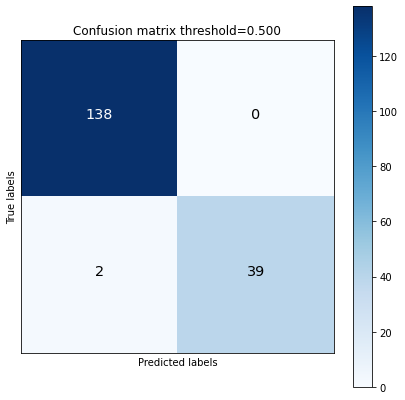

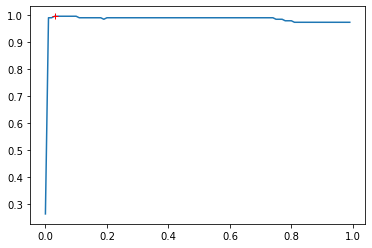

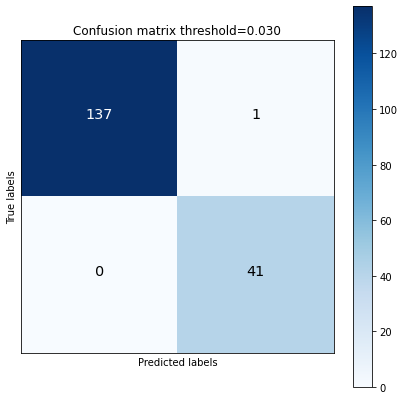

######################################
### CALCULATE TEST SET PERFORMANCE ###
######################################
Found 571 images belonging to 2 classes.


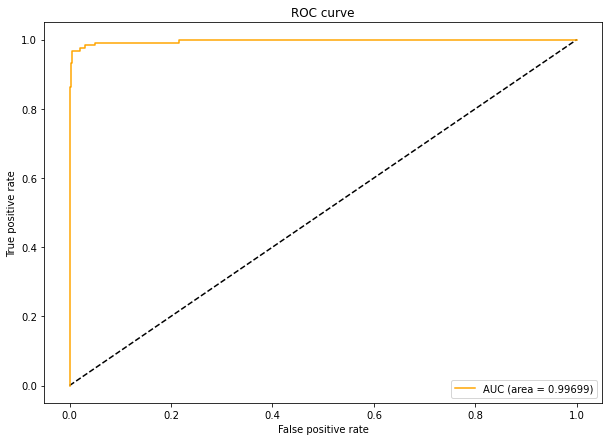

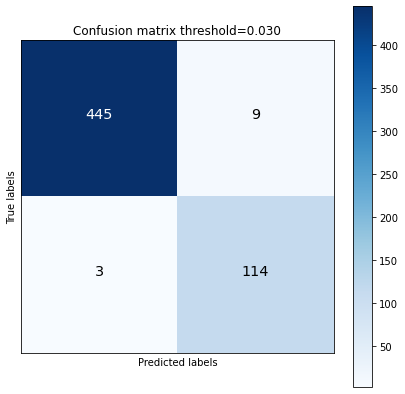

Truth:0.0
Pred:0.048694193
30


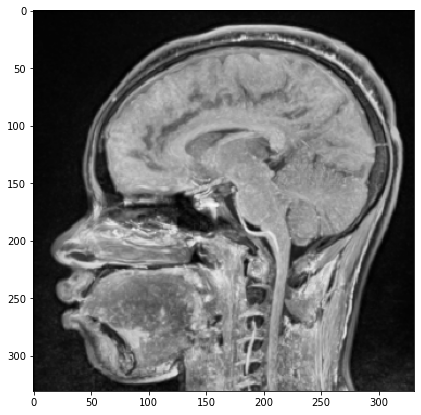

Truth:0.0
Pred:0.6309242
49


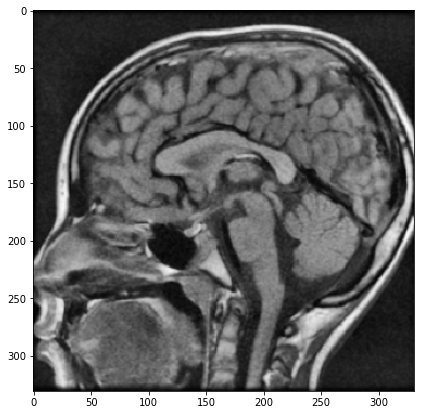

Truth:0.0
Pred:0.21723208
93


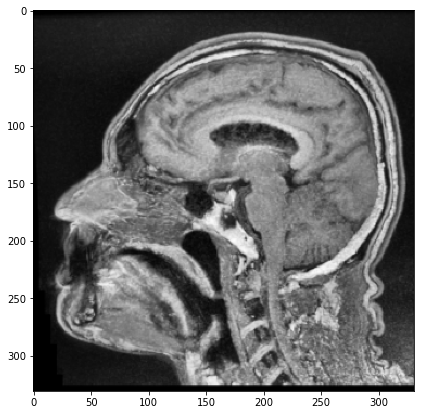

Truth:0.0
Pred:0.09183186
116


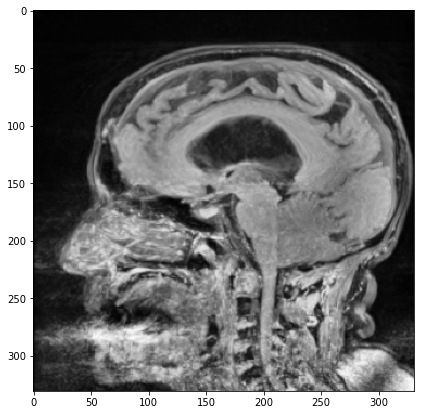

Truth:0.0
Pred:0.07208878
305


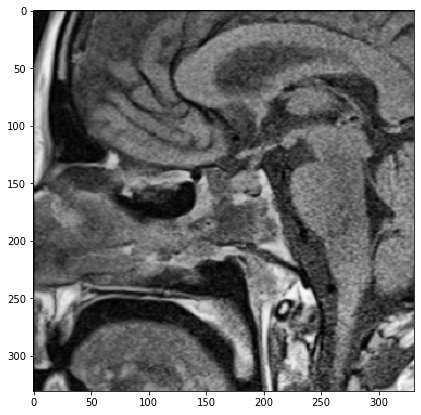

Truth:1.0
Pred:0.000120937824
318


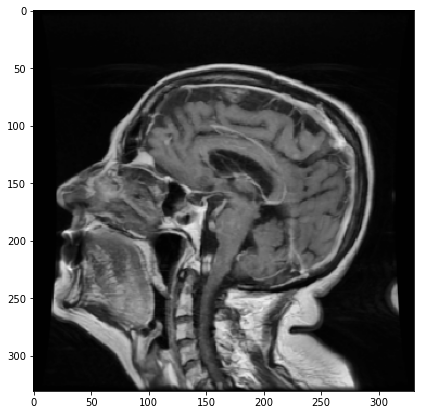

Truth:0.0
Pred:0.9524096
386


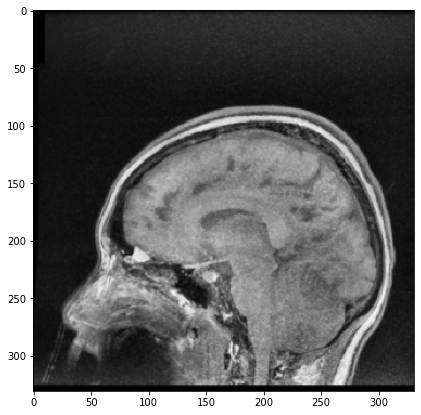

Truth:0.0
Pred:0.108588964
403


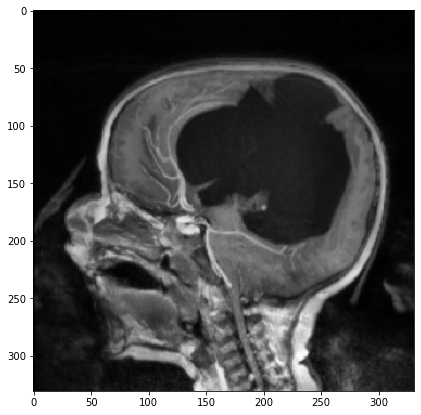

Truth:1.0
Pred:0.004827529
437


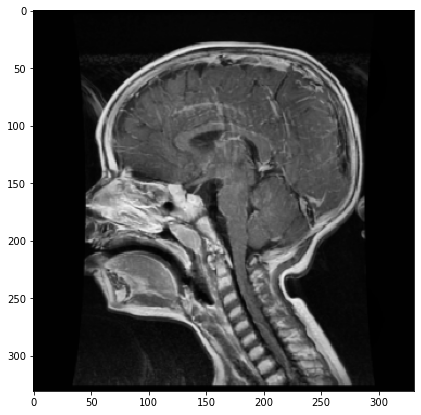

Truth:0.0
Pred:0.0606246
473


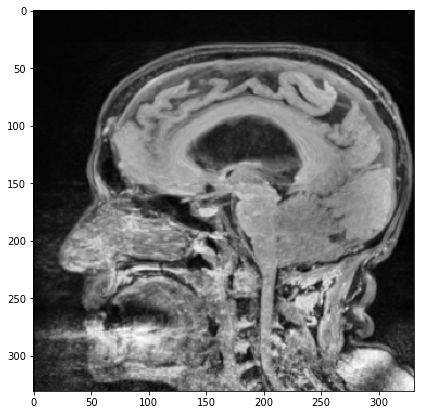

Truth:1.0
Pred:0.01346761
481


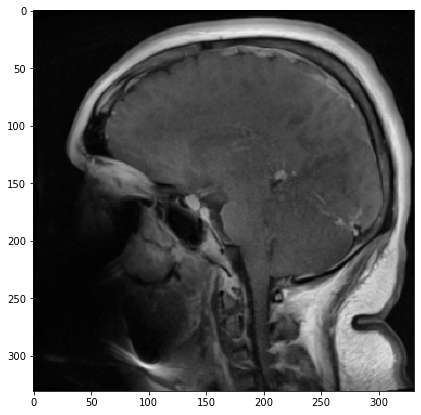

Truth:0.0
Pred:0.17209333
532


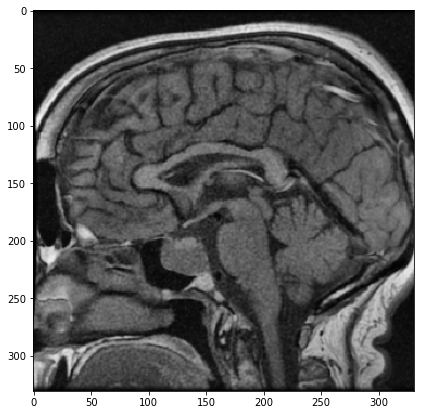

Model Submitted Successfully for team tester


In [31]:
##############################
### LOAD THE TRAINED MODEL ###
##############################

model = load_model('SimpleGadClass_vesion2.h5')


############################################
### CALCULATE VALIDATION SET PERFORMANCE ###
############################################

print('############################################')
print('### CALCULATE VALIDATION SET PERFORMANCE ###')
print('############################################')

val_it = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,  # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='rgb',
    subset='validation')  # set as validation data

y_true, y_pred, _ = get_labels_and_preditions(val_it, model)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred)

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC (area = {:.5f})'.format(auc_keras), color='orange')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

thresh = 0.5
cm = confusion_matrix(y_true, y_pred > thresh)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > 120 else "black", size='x-large')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix threshold={:.3f}'.format(thresh))
plt.colorbar()
plt.show()

thr_list = []
acc_list = []
for _th in range(100):
    _th = _th / 100.
    thr_list.append(_th)
    acc_list.append(accuracy_score(y_true, y_pred > _th))

plt.figure()
plt.plot(thr_list,acc_list)
plt.plot(thr_list[acc_list.index(max(acc_list))], max(acc_list), 'r+')
plt.show()

thresh = thr_list[acc_list.index(max(acc_list))]

cm = confusion_matrix(y_true, y_pred > thresh)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > 120 else "black", size='x-large')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix threshold={:.3f}'.format(thresh))
plt.colorbar()
plt.show()

######################################
### CALCULATE TEST SET PERFORMANCE ###
######################################

print('######################################')
print('### CALCULATE TEST SET PERFORMANCE ###')
print('######################################')

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_it = test_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode='rgb')  # set as training data

y_true, y_pred, x_test = get_labels_and_preditions(test_it, model)

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred)

auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='AUC (area = {:.5f})'.format(auc_keras), color='orange')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

cm = confusion_matrix(y_true, y_pred > thresh)

plt.figure(figsize=(7,7))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > 120 else "black", size='x-large')
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix threshold={:.3f}'.format(thresh))
plt.colorbar()
plt.show()

for i in range(len(y_true)):
    if y_true[i] != 1. * (y_pred[i, 0] > thresh):
        print('Truth:' + str(y_true[i]))
        print('Pred:' + str(y_pred[i, 0]))
        print(i)
        plt.figure(figsize=(7,7))
        plt.imshow(x_test[i])
        plt.show()

########################
### SUBMIT THE MODEL ###
########################

hyperparam['metric'] = auc_keras
sub_model(team, hyperparam)